# Introduction to Librosa: Basic Usage in Python
Librosa is a powerful Python library for audio and music analysis. It provides essential tools and functions to work with audio data efficiently. In this tutorial, we'll explore the basic usage of Librosa to analyze and manipulate audio files.

1. Installation
First, make sure you have Librosa installed. You can install it using pip:

In [ ]:
pip install librosa

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 2. Sampling Rate Considerations
The sampling rate (sr) represents the number of samples of audio carried per second. When working with audio, it's crucial to understand and maintain the original sampling rate for accurate analysis.

#3. Reading a WAV File
Let's begin by reading a WAV file and ensuring that we obtain its original sampling rate:

In [ ]:
import librosa

# Load audio file and get its original sampling rate
audio_path = "/content/test.wav"
audio, original_sr = librosa.load(audio_path, sr=None)

print(f"Original Sampling Rate: {original_sr} Hz")


Original Sampling Rate: 24000 Hz


Using librosa.load() with sr=None ensures we preserve the original sampling rate. otherwise, if you don't define the sampling rate to None, it will by default undersample or upsample to have a sampling rate of 22k which can result in loss of information.

#4. Upsampling and Undersampling
Manipulating the sampling rate through upsampling and undersampling can impact audio quality. Librosa provides tools for this purpose. Consider this example of upsampling:

In [ ]:
# Upsample audio to a desired sampling rate
desired_sr = 44100
upsampled_audio, new_sr = librosa.load(audio_path, sr = desired_sr)

print(f"Upsampled Audio Sampling Rate: {new_sr} Hz")


Upsampled Audio Sampling Rate: 44100 Hz


In [ ]:
# Downsample audio to a desired sampling rate
desired_sr = 512
downsampled_audio, new_sr = librosa.load(audio_path, sr = desired_sr)

print(f"Downsampled Audio Sampling Rate: {new_sr} Hz")


Downsampled Audio Sampling Rate: 512 Hz


# 5. Supported Audio File Types
Librosa supports various audio file types. Here are examples:

In [ ]:
# Reading different audio file types
mp3_audio, _ = librosa.load("example_audio.mp3", sr=None)
ogg_audio, _ = librosa.load("example_audio.ogg", sr=None)
flac_audio, _ = librosa.load("example_audio.flac", sr=None)

# Print the shapes of the loaded audio
print("MP3 Shape:", mp3_audio.shape)
print("OGG Shape:", ogg_audio.shape)
print("FLAC Shape:", flac_audio.shape)

# 6. Spectrogram
Next, let's generate a spectrogram to visualize the frequency content of the audio signal over time.

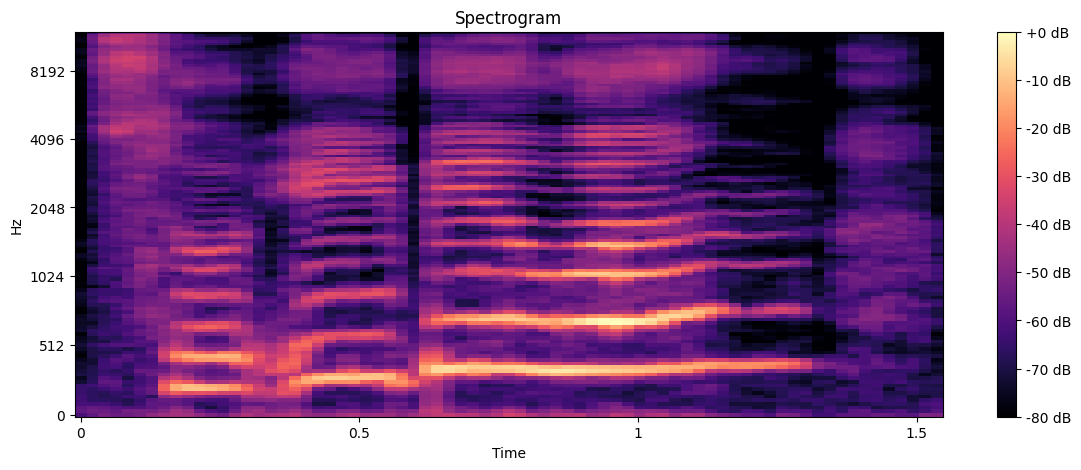

In [ ]:
# Calculate the spectrogram

specgram = librosa.feature.melspectrogram(y=audio, sr=original_sr)

# Convert to decibels
db_specgram = librosa.power_to_db(specgram, ref=np.max)

# Display the spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(db_specgram, sr=original_sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram")
plt.show()

This code calculates the mel spectrogram of the audio signal and converts it to decibels for better visualization.

# 7. Chromagram
Now, let's extract the chromagram to analyze the pitch content of the audio.

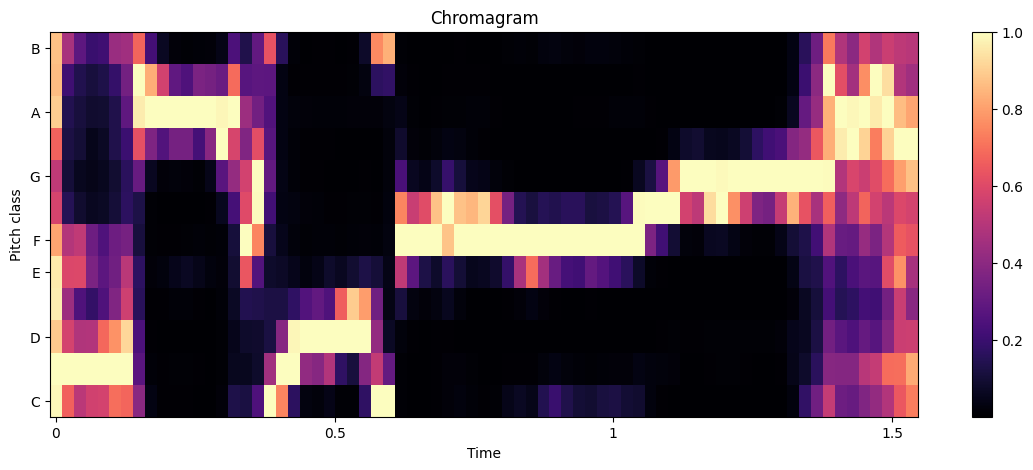

In [ ]:
# Calculate the chromagram
chroma = librosa.feature.chroma_stft(y=audio, sr=original_sr)

# Display the chromagram
plt.figure(figsize=(14, 5))
librosa.display.specshow(chroma, sr=original_sr, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title("Chromagram")
plt.show()

This code computes the chromagram of the audio signal, representing the pitch content in each frame.

# 8. Tempo and Beat Tracking
Librosa can also estimate the tempo and track the beats in the audio.

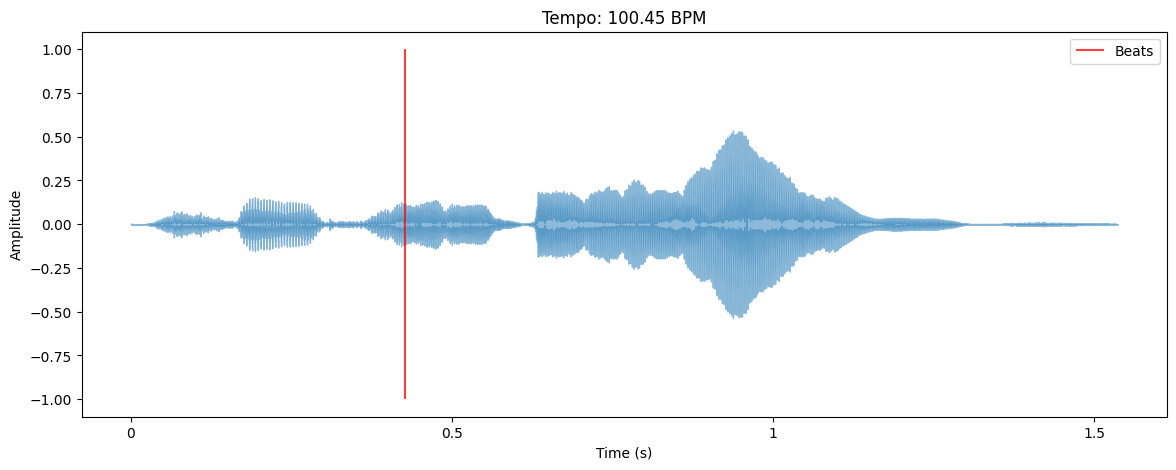

In [ ]:
# Estimate tempo and beats
tempo, beat_frames = librosa.beat.beat_track(y=audio, sr=original_sr)

# Visualize beat positions
plt.figure(figsize=(14, 5))
beat_times = librosa.frames_to_time(beat_frames, sr=original_sr)
librosa.display.waveshow(audio, sr=original_sr, alpha=0.5)
plt.vlines(beat_times, -1, 1, color='r', alpha=0.75, label='Beats')
plt.title(f"Tempo: {tempo:.2f} BPM")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# 9. Most Interesting Librosa Functions
Explore these Librosa functions for more advanced analysis:



```
librosa.feature.melspectrogram(): Mel spectrogram computation.
librosa.feature.chroma_stft(): Chromagram feature extraction.
librosa.beat.beat_track(): Beat tracking in audio.
librosa.effects.trim(): Trim leading and trailing silence from an audio signal.
```



These functions offer a glimpse into the diverse capabilities of Librosa for audio analysis.

This comprehensive guide provides a solid foundation for using Librosa in your audio projects. Experiment with different functions to unlock the full potential of this powerful library. Happy coding!

For more tutorials checkout our [git](https://github.com/maymunashah/Music-Data-tutorials-with-python) or [blog](https://rubikai.odoo.com/)